# Todo:

1.  _figure out how to use python/gis only instead of excel for ibound import_
2. Clean up the graphs, apply labels
3. Find out why m.write_input() is deleting the external ibound file we uploaded

## University of Pennsylvania, Masters in Applied Geosciences

### Groundwater Flow and Transport Modeling, Prepared by Carl Mastropaolo

### Class Problem 3B

#### Notebook by Spencer Harris

In [1]:
import sys
print(sys.executable)

/home/sbhgeo/Documents/Fogland/conda/bin/python


In [2]:
%matplotlib inline 
# '%' is a notebook specific command, remove if running outside of notebook
import os 
import flopy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mfexe = os.path.join("..", "..", "..", "bin", "mf2005.nix") # adds path to mf2005.nix, which will be our executeable, to mfexe
abspath = os.path.abspath(mfexe) # assigns absolute path of mfexe to abspath, double checking
print(mfexe) #printing the variables
print(abspath)
print('if this =>  \"', os.path.isfile(mfexe),'\"  prints true, that means executable is in the correct spot')

../../../bin/mf2005.nix
/home/sbhgeo/Documents/Fogland/bin/mf2005.nix
if this =>  " True "  prints true, that means executable is in the correct spot


### Model starts below:

In [4]:
# creating an empty modflow container in FloPy, m is being defined as a python object
# Modflow model is stored in flopy -> modflow -> 
# shift + tab here to see how to input necessary files

m = flopy.modflow.Modflow(modelname = 'Prob3b', exe_name = mfexe) 

--------------------
#### Dis package

In [5]:
nlay = 1
nrow = 27
ncol = 13
nper = 3
itmuni = 4
lenuni = 1
laycbd = 0
delr = 200.
delc = 200.
top = 20.
botm = -10.
perlen = np.array([100., 1., 1000.]) 
nstp = np.array([1, 20, 100])
tsmult = 1
steady = np.array([True, False, False])

dis = flopy.modflow.ModflowDis(m, nlay=nlay, nrow=nrow, ncol=ncol, nper=nper, delr=delr, delc=delc, 
                               laycbd=laycbd, top=top, botm=botm, perlen=perlen, nstp=nstp, tsmult=tsmult, 
                               steady=steady, itmuni=itmuni, lenuni=lenuni)

--------------------
#### Bcf package

In [6]:
laycon = 1
hdry = 777.77
trpy = 1.0
hy = 50.0
sf2 = 0.15
bcf = flopy.modflow.ModflowBcf(m, laycon=laycon, trpy=trpy, hdry=hdry, sf2=sf2, hy=hy)
# help(flopy.modflow.ModflowBcf)

--------------------
#### Bas package
We are pulling in an external ibound file here, which was made using some excel magic: to/make get the file look here https://sites.google.com/site/fateandtransportmodeling/class-problems/Drawing%20%26%20Ibound.xls?attredirects=0&d=1  

Ideally we will want to learn how to make ibound arrays from vector shapefiles  

**Important note**
Make sure that you put this external file (ibound.prn) somewhere outside of the directory/folder which contains the working notebook.  
Apparently if you put the file in the notebook/model folder ```m_writ_input()``` deletes it somehow, which is bad, maybe you can pass something to that command so that it wont do it, but this is my current work around for now.


In [7]:
ib = os.path.join("..","ClassP_3_data", "ibound.prn") # adds path to ibound array, which is given 
abspath_ib = os.path.abspath(ib) # assigns absolute path of ib to abspath_ib, double checking
print(ib) #printing the variables
print(abspath_ib)
print('if this =>  \"', os.path.isfile(ib),'\"  prints true, that means executable is in the correct spot')

../ClassP_3_data/ibound.prn
/home/sbhgeo/Documents/Fogland/Notebooks/FT_class/ClassP_3_data/ibound.prn
if this =>  " True "  prints true, that means executable is in the correct spot


In [8]:
ibound = ib
strt = np.ones((nlay, nrow, ncol), dtype=np.float)
strt[:,:,:] = 5.0 #assigns 50' head to all cells

bas = flopy.modflow.ModflowBas(m, ibound=ibound, strt=strt)

#print(ibound)
#print(strt)


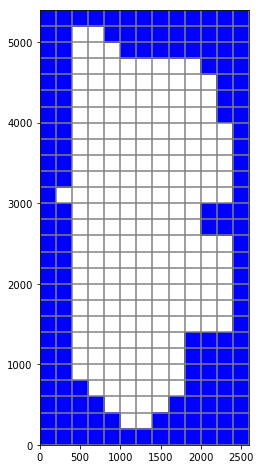

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
modelmap = flopy.plot.ModelMap(model=m)
quadmesh = modelmap.plot_ibound()
linecollection = modelmap.plot_grid()

--------------------
#### Sip package & Oc package

In [10]:
sip = flopy.modflow.ModflowSip(m, mxiter=100, nparm=5, accl=1, hclose=1e-04, ipcalc=1, wseed=2e-12, iprsip=1)

#below is output control
stress_period_data = {(0,0):['save head','save budget']}
oc = flopy.modflow.ModflowOc(m, stress_period_data=stress_period_data)

#help(flopy.modflow.ModflowOc)

--------------------
#### Recharge pacakge

In [11]:
#flopy.ModflowRch(model, rech=0.001)
#help(flopy.modflow.ModflowRch)

rech = {}
rech[0] = 2.3e-3 #stress period 1 to 4
rech[1] = 0. #stress period 5 and 6
rech[2] = 2.3e-3 #stress preiod 7 to the end
rch = flopy.modflow.ModflowRch(m, nrchop=3, rech=rech)


####  writing our MODFLOW-2005 input files!

In [12]:
#m.write_input()
m.write_input()

#### running the model

In [13]:
m.run_model()

FloPy is using the following executable to run the model: ../../../bin/mf2005.nix

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Prob3b.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/10/12 17:15:38

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     7    Ground-Wa

(True, [])

#### fetching the heads file from the MODFLOW output

In [14]:
subfolder = '.'
fname = os.path.join(subfolder, 'Prob3b.hds')
headobj = flopy.utils.HeadFile(fname)
headarray = headobj.get_data()
#help(flopy.utils.HeadFile)
print(headobj)

#### plotting the heads using modelmap 

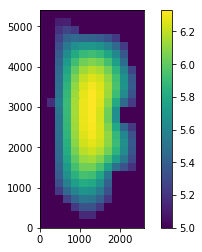

In [15]:
mm = flopy.plot.ModelMap(model=m)
#mm.plot_ibound()
#mm.plot_grid()
mm.plot_array(headarray)
hplot = mm.plot_array(headarray)
plt.colorbar(hplot)
#help(mm.plot_array)

#### plotting in model grid (ncol, nlay)

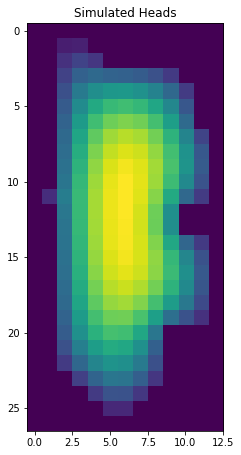

In [16]:
# Make a simple head plot
fig = plt.figure(figsize=(5, 7.5))
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(headarray[0,:,:], interpolation='nearest')
ax.set_title('Simulated Heads')

#### The head levels from which we are creating the above plot

In [17]:
print(headarray)

[[[ 5.          5.          5.          5.          5.          5.          5.
    5.          5.          5.          5.          5.          5.        ]
  [ 5.          5.          5.10933638  5.12443686  5.          5.          5.
    5.          5.          5.          5.          5.          5.        ]
  [ 5.          5.          5.19011259  5.26506758  5.21195126  5.          5.
    5.          5.          5.          5.          5.          5.        ]
  [ 5.          5.          5.26314306  5.41160536  5.45675945  5.42413473
    5.41089439  5.38542938  5.33186674  5.22622728  5.          5.          5.        ]
  [ 5.          5.          5.32698679  5.54004383  5.65696144  5.70117331
    5.70623493  5.67172098  5.58956146  5.44685888  5.23287296  5.          5.        ]
  [ 5.          5.          5.37949085  5.64343357  5.80981779  5.89643764
    5.91971779  5.88392878  5.78552771  5.61501074  5.35824823  5.          5.        ]
  [ 5.          5.          5.4207716   5.7230